# Sam Jackson, MAE 494, HW2

This code provides answers to the questions posed in Homework 2. The packages used in this homework assignment are numpy, matplotlib.pyplot and scipy.optimize.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Problem 1
First, finding the stationary point by finding the gradient of the function and setting it equal to 0...

$f(x)= 2x_1^2-4x_1x_2+1.5x_2^2+x_2$

$g(x)=\begin{bmatrix}\frac{\partial f(x)}{\partial x_1}\\ \frac{\partial f(x)}{\partial x_2}\end{bmatrix} = \begin{bmatrix}4x_1-4x_2 \\\\ -4x_1+3x_2+1\end{bmatrix} = 0$

Therefore, $x_1=1 , x_2=1$ is the stationary point.

Now showing that this is a saddle point by proving it has an indefinite Hessian...

$H(x)=\begin{bmatrix}\frac{\partial^2 f(x)}{\partial x_1^2} & \frac{\partial^2 f(x)}{\partial x_1 \partial x_2} \\\\ \frac{\partial^2 f(x)}{\partial x_2 \partial x_1} & \frac{\partial^2 f(x)}{\partial x_2^2}\end{bmatrix}= \begin{bmatrix} 4 & -4  \\\\ -4 & 3\end{bmatrix}$

Finding the eigenvalues of the Hessian...

$0=|H(x)-\lambda I|=det\begin{bmatrix} 4-\lambda & -4 \\\\ -4 & 3-\lambda \end{bmatrix}=(4-\lambda)(3-\lambda)-(-4)(-4)=\lambda^2-7\lambda-4$

$\lambda=7.531, -0.531$

Confirming this using Python...

In [51]:
H=np.array([[4,-4],[-4,3]])
eigs=np.linalg.eigvals(H)
print('Lambda=',eigs)

Lambda= [ 7.53112887 -0.53112887]


Thus, since one of the eigenvalues of the Hessian is positive and the other is negative the Hessian is considered indefinite and the stationary point is a saddle point.

## Problem 2
##### Formulating the problem

First, formulating the problem as a minimization problem. Using the length formula to find the distance from the point at $(-1,0,1)^T$ to the point on the plane $x_1+2x_2+3x_3=1$.

$F(x)=\sqrt{(x_1-(-1))^2+(x_2-0)^2+(x_3-1)^2}$

Since we are looking for the nearest point, this equation is what we are trying to minimize while being subject to the equation $x_1+2x_2+3x_3=1$. $F$ contains an overall square root which makes taking the double partial derivative more difficult but does not affect the point in which the minimum occurs at (minimum of $f$ occurs at same point as $f^2$). Because of this, I choose to define a new function to minimize, $f$, where $f=F^2$. This makes analysis such as finding the Hessian of $f$ significantly easier whilst still producing the point which minimizes the length between the plane and the point. Putting this into the familiar minimization form...

$$\begin{aligned} &\text{minimize:} && (x_1+1)^2+x_2^2+(x_3-1)^2 \\ &\text{subject to:} && x_1+2x_2+3x_3-1=0 \end{aligned}$$

##### Is this a convex problem?

Next, answering the question of if this is a convex problem. First, let's find the eigenvalues of the Hessian to find if it is  at least positive semi-definite.

$H(x)=\begin{bmatrix}\frac{\partial^2 f(x)}{\partial x_1^2} & \frac{\partial^2 f(x)}{\partial x_1 \partial x_2} & \frac{\partial^2 f(x)}{\partial x_1 \partial x_3}\\ \frac{\partial^2 f(x)}{\partial x_2 \partial x_1} & \frac{\partial^2 f(x)}{\partial x_2^2} & \frac{\partial^2 f(x)}{\partial x_2 \partial x_3}\\ \frac{\partial^2 f(x)}{\partial x_3 \partial x_1} & \frac{\partial^2 f(x)}{\partial x_3 \partial x_2} & \frac{\partial^2 f(x)}{\partial x_3^2}\end{bmatrix}=\begin{bmatrix}2 & 0 & 0 \\\\ 0 & 2 & 0 \\\\ 0 & 0 & 2\end{bmatrix}$

$ 0=H-\lambda I=det\begin{bmatrix}2-\lambda & 0 & 0 \\\\ 0 & 2-\lambda&0 \\\\ 0 & 0 & 2-\lambda\end{bmatrix} $

$\lambda=2$

Since the Hessian of this function is positive definite and the only constraints are that the solutions must be on a plane, which is a convex set, this problem is indeed convex.

This problem can also be converted into an unconstrained optimization problem by simply solving the constraint equation for one of the variables and substituting into the minimized equation. I choose to solve for $x_1$ and sub it in...

$x_1=1-2x_2-3x_3$

$(x_1+1)^2+x_2^2+(x_3-1)^2=((1-2x_2-3x_3)+1)^2+x_2^2+(x_3-1)^2=(2-2x_2-3x_3)^2+x_2^2+(x_3-1)^2$ 

$$\begin{aligned} &\text{minimize:} &&5x_2^2+12x_2x_3-8x_2+10x_3^2-14x_3+5\end{aligned}$$

To confirm our previous finding that this problem is convex, we could find the eigenvalues of the Hessian of this new equation...

$grad(x)=\begin{bmatrix}\frac{\partial f(x)}{\partial x_2} \\ \frac{\partial f(x)}{\partial x_3}\end{bmatrix} =\begin{bmatrix}10x_2+12x_3-8 \\ 12x_2+20x_3-14 \end{bmatrix}$

$H(x)=\begin{bmatrix}\frac{\partial^2 f(x)}{\partial x_2^2} & \frac{\partial^2 f(x)}{\partial x_2 \partial x_3} \\ \frac{\partial^2 f(x)}{\partial x_3 \partial x_2} & \frac{\partial^2 f(x)}{\partial x_3^2}\end{bmatrix}=\begin{bmatrix}10&12\\12&20\end{bmatrix}$

$0=H-\lambda I=det\begin{bmatrix}10-\lambda&12\\12&20-\lambda\end{bmatrix}=(10-\lambda)(20-\lambda)-(12)^2=\lambda^2-30\lambda+56$

$\lambda=2,28$

Confirming this using Python...

In [58]:
H=np.array([[10,12],[12,20]])
eigs=np.linalg.eigvals(H)
print('Lambda=',eigs)

Lambda= [ 2. 28.]


Thus confirms our prior conclusion that this is a convex problem. We can now go about solving for the point which produces the minimum value now that we know the H is positive definite.

##### Solving the problem using built in Python libraries

Using this unconstrained optimization problem formulation, we can now minimize the function using built-in Python libraries similar to HW1.

In [53]:
# Defining the given function to be optimized
givenfun = lambda x: ((2 - 2*x[0] - 3*x[1]) ** 2 + (x[0]) ** 2 + (x[1] - 1) ** 2)

# Defining the initial guesses given to the minimize function
x0 = (1, 1)

# Plugging all of the above into the minimize functions and using SLSQP method
res = minimize(givenfun, x0, method='SLSQP')

# Printing out the minimize results using the different initial guesses
print('Minimize results with initial guesses [x2, x3] = [1, 1]  :', res.x)

Minimize results with initial guesses [x2, x3] = [1, 1]  : [-0.14285714  0.78571428]


As we are using the unconstrained variation of the problem the program will only give us the values for $x_2$ and $x_3$, where the program produced $x_2=-0.14285714$ and $x_3=0.78571428$. Using the equation used to convert the constrained variation of the problem to the unconstrained variation we can find the value of $x_1$.

$x_1=1-2x_2-3x_3=1-2(-0.14285714)-3(0.78571428)$

$x_1=-1.64285714$

Thus, the closest point to $(-1,0,1)^T$ on the plane $x_1+2x_2+3x_3-1=0$ is $(-1.64285714,-0.14285714,0.78571428)$ using Python libraries using an initial guess of $(-4,1,1)$.

##### Solving the problem using gradient descent with a constant step size

Now solving this new unconstrained problem using both the gradient descent method and Newton's algorithm. First using the gradient descent method with a constant step size.

Using the gradient descent method with constant step size a= 0.01  and initial guesses [x2, x3]= [[1. 1.]] .
The found solution was [x2,x3]= [[-0.14244836  0.78544176]]


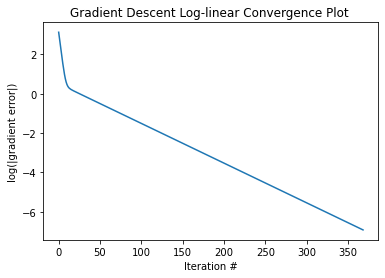

In [54]:
# Note: x2=x[0] and x3=x[1] in this code
obj = lambda x: (5 * x[0] **2 + 12 * x[0] * x[1] - 8 * x[0] + 10 * x[1] **2 - 14 * x[1] + 5)
grad = lambda x: np.array([10 * x[0] + 12 * x[1] - 8,12 * x[0] + 20 * x[1] - 14]) # gradient computed previously
eps = 1e-3  # termination criterion
x0 = np.array([[1.], [1.]])  # initial guess, same as used in solving w/ Python libraries
k = 0  # counter
soln = [x0]  # use an array(of arrays) to store the search steps
x = soln[k]  # start with the initial guess
error = np.linalg.norm(grad(x))  # compute the initial error.
errorsoln = [error] # use of array to store error

a = 0.01  # set a fixed step size (no line search used in this case)

while error >= eps:  # keep searching while gradient norm is larger than eps
    k = k + 1 # counts the counter
    x = x - a * grad(x) # moves x down the gradient proportional to the step size (gradient descent)
    soln.append(x) # updates solution array
    error = np.linalg.norm(grad(x)) # recomputes gradient error at updated x
    errorsoln.append(error) # updates error array

plt.plot(np.linspace(0,k,k+1),np.log(errorsoln))
plt.title('Gradient Descent Log-linear Convergence Plot ')
plt.xlabel('Iteration #')
plt.ylabel('log(|gradient error|)')

print('Using the gradient descent method with constant step size a=', a,' and initial guesses [x2, x3]=',x0.T,'.')
print( 'The found solution was [x2,x3]=',soln[k].T) #prints the final iteration of the solution

As we can see from the readout above, the gradient descent method code produced a very similar minimization result to the Python libraries, ($x_2=-0.14244836$ and $x_3=0.78544176$ compared to $x_2=-0.14285714$ and $x_3=0.78571428$) when input with the same initial guesses of $x_2=x_3=1$. This descrepancy is likely from the fact that the gradient descent method only used an error cutoff of $\epsilon=1e^-3$, making this lower would likely reduce the descrepancy. We can also see that after an initial large dip in the log of the gradient error, the relationship between the log of the gradient error and the number of iterations is linear, as expected of this method.

##### Solving the problem using gradient descent with Armijo line search

Now that we have seen that gradient descent works with a constant step size, let's implement a method for finding a step size that is more efficient per iteration, the Armijo line search method. The parameters used in the previous code, initial conditions, $\epsilon$, etc, will remain the same and the the parameters related to the Armijo line search will be $t=0.3, b=0.5$. These values were chosen arbitrarily from the acceptable range of $t \in [0.01, 0.3]$ and $b \in [0.1, 0.8]$ given in class.

Using the gradient descent method using the Armijo line search method with initial guesses [x2, x3]= [[1. 1.]] .
The found solution was [x2,x3]= [[-0.14254229  0.78549412]]


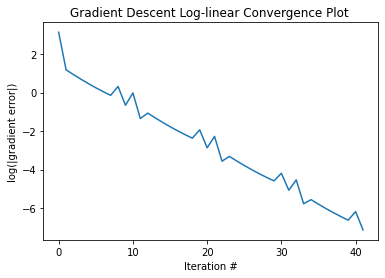

In [55]:
# Note: x2=x[0] and x3=x[1] in this code
obj = lambda x: (5 * x[0] **2 + 12 * x[0] * x[1] - 8 * x[0] + 10 * x[1] **2 - 14 * x[1] + 5)
grad = lambda x: np.array([10 * x[0] + 12 * x[1] - 8,12 * x[0] + 20 * x[1] - 14]) # gradient computed previously
eps = 1e-3  # termination criterion
x0 = np.array([[1.], [1.]])  # initial guess, same as used in solving w/ Python libraries
k = 0  # counter
soln = [x0]  # use an array(of arrays) to store the search steps
x = soln[k]  # start with the initial guess
error = np.linalg.norm(grad(x))  # compute the initial error.
errorsoln = [error] # use of array to store error

# Armijo line search
def line_search(x):
    a = 1.  # initialize step size
    phi = lambda a, x: obj(x) - a * 0.3 * grad(x).T @ grad(x)  # define phi as a search criterion
    while phi(a, x) < obj(x - a * grad(x)):  # if f(x+a*d)>phi(a) then backtrack. d is the search direction
        a = 0.5 * a
    return a

while error >= eps:  # keep searching while gradient norm is larger than eps
    k = k + 1 # counts the counter
    a = line_search(x)
    x = x - a * grad(x) # moves x down the gradient proportional to the step size (gradient descent)
    soln.append(x) # updates solution array
    error = np.linalg.norm(grad(x)) # recomputes gradient error at updated x
    errorsoln.append(error) # updates error array

plt.plot(np.linspace(0,k,k+1),np.log(errorsoln))
plt.title('Gradient Descent Log-linear Convergence Plot ')
plt.xlabel('Iteration #')
plt.ylabel('log(|gradient error|)')

print('Using the gradient descent method using the Armijo line search method with initial guesses [x2, x3]=',x0.T,'.')
print( 'The found solution was [x2,x3]=',soln[k].T) #prints the final iteration of the solution

As we can see from the readout above, the gradient descent method code with the Armijo line search method produced a solution much closer to the Python libraries than the gradient descent method code with constant step size, all with inputs of initial guesses the same $x_2=x_3=1$. We can also see that this code experienced a similar initial large dip in the log of the gradient error and had a similar linear relationship between the log of the gradient error and the number of iterations, but with this method the relationship converged on its answer much quicker than the constant step size variation, albiet with a two-peak phenomenon interrupting the linearity likely due to the iterative inconsistancy in the Armijo line search method.

##### Solving the problem using Newton's algorithm

Now solving the unconstrained problem using Newton's algorithm with Armijo line search. Note, the parameters were chosen to be the as in the prior codes.

Using Newtons method using Armijo line search method with initial guesses [x2, x3]= [[1. 1.]] .
The found solution was [x2,x3]= [[-0.14285714  0.78571429]]


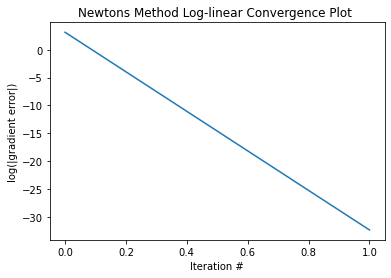

In [57]:
# Note: x2=x[0] and x3=x[1] in this code
obj = lambda x: (5 * x[0] **2 + 12 * x[0] * x[1] - 8 * x[0] + 10 * x[1] **2 - 14 * x[1] + 5)
grad = lambda x: np.array([10 * x[0] + 12 * x[1] - 8,12 * x[0] + 20 * x[1] - 14]) # gradient computed previously
H = np.array([[10,12],[12,20]])
eps = 1e-3  # termination criterion
x0 = np.array([[1.], [1.]])  # initial guess, same as used in solving w/ Python libraries
k = 0  # counter
soln = [x0]  # use an array(of arrays) to store the search steps
x = soln[k]  # start with the initial guess
error = np.linalg.norm(grad(x))  # compute the initial error.
errorsoln = [error] # use of array to store error

# Armijo line search
def line_search(x):
    a = 1.  # initialize step size
    phi = lambda a, x: obj(x) - a * 0.3 * grad(x).T @ np.linalg.inv(H) @ grad(x)  # define phi as a search criterion
    while phi(a, x) < obj(x - a * np.linalg.inv(H) @ grad(x)):  # if f(x+a*d)>phi(a) then backtrack. d is the search direction
        a = 0.5 * a
    return a

while error >= eps:  # keep searching while gradient norm is larger than eps
    k = k + 1 # counts the counter
    a = line_search(x)
    x = x - a * np.linalg.inv(H) @ grad(x) # moves x down the gradient proportional to the step size (gradient descent)
    soln.append(x) # updates solution array
    error = np.linalg.norm(grad(x)) # recomputes gradient error at updated x
    errorsoln.append(error) # updates error array

plt.plot(np.linspace(0,k,k+1),np.log(errorsoln))
plt.title('Newtons Method Log-linear Convergence Plot ')
plt.xlabel('Iteration #')
plt.ylabel('log(|gradient error|)')

print('Using Newtons method using Armijo line search method with initial guesses [x2, x3]=',x0.T,'.')
print( 'The found solution was [x2,x3]=',soln[k].T) #prints the final iteration of the solution

As we can see from the readout above, Newton's method using Armijo line search converged with only one iteration, and matched the numbers produced by the Python libraries code perfectly essentially 0 gradient error. Both of these occurances are likely because the objective function is quadratic, so Newton's method which uses information of Hessian, which does not change as all higher order derivatives equal 0, becomes an exact solution instantly. Note, this only is possible because the Armijo line search starts with $a=1$, allowing Newton's method to work without being augmented by any scaling due to alpha values and the Armijo method recognizes that the lowest value has been found and pushes that $a=1$ to the main minimization code.

## Problem 3

###### Proof that $af(x)+bg(x)$ is convex

First, defining a new function...
$h(x)=af(x)+bg(x)$

Next, find the gradient and Hessian of this new function...

$grad(x)=\frac{\partial h(x)}{\partial x}=\frac{d(af(x))}{dx}+\frac{d(bg(x))}{dx}=af'(x)+bg'(x)$

$H(x)=\frac{\partial grad(x)}{\partial x}=\frac{d(af'(x))}{dx}+\frac{d(bg'(x))}{dx}=af''(x)+bg''(x)$

As given, both f(x) and g(x) are convex thus their double derivatives are positive on the convex set $\mathcal{X}$, this along with the fact that both a and b are $>0$ means that H(x) will always be positive, and thus positive definite and convex, on the convex set $\mathcal{X}$.

###### Finding the conditions under which f(g(x)) is convex

Find the gradient and Hessian of this new function...

$grad(x)=\frac{\partial f(g(x))}{\partial x}=\frac{df(g(x))}{dg(x)}\frac{dg(x)}{dx}=f'(g(x))g'(x)$

$H(x)=\frac{\partial f'(g(x))*g'(x)}{\partial x}=\frac{df'(g(x))}{\partial x}\frac{dg(x)}{d x}g'(x)+\frac{dg'(x)}{dx}f'(g(x))$

$H(x)=g'(x)^2f''(g(x))+g''(x)f'(g(x))$

As given, both f(x) and g(x) are convex thus their double derivatives are positive on the convex set $\mathcal{X}$, thus for $H(x)$ to be positive, making f(g(x)) convex, the sum of these two terms needs to be positive. This can happen in five cases:  
1. $f''(g(x))\ge0, f'(g(x))\gt0$
2. $g'(x)=0, f'(g(x))\gt0$
3. $g'(x)\ne0, f''(g(x))\gt0, f'(g(x))\ge0$
4. $g'(x)\ne0, f''(g(x))\gt0, f'(g(x))\lt0, g'(x)^2f''(g(x))\gt g''(x)f'(g(x))$
5. $g'(x)\ne0, f''(g(x))\lt0, f'(g(x))\gt0, g'(x)^2f''(g(x))\lt g''(x)f'(g(x))$

Note: It may be easy to confuse, but do not know if f''(g(x)) is positive on the convex set $\mathcal{X}$, we only know that f(x) is convex on the convex set $\mathcal{X}$, thus creating the complicated conditions for convexity listed above.


## Problem 4

The Taylor series for a function, f(x) is as such...

$f(x_1)=f(x_0)+g_{x0}^T(x_1-x_0)+\frac{1}{2}(x_1-x_0)^TH_{x0}(x_1-x_0)+O(||x_1-x_0||^2)$

Since we know that f(x) is convex for $\mathcal{X} \to \mathcal{R}$ we know that $H$ is positive semi-definite for all of $\mathcal{X}$ and we know that any higher order trends will not influence the function to stop being convex, thus they must be either 0, or positive, in other words, posite semi-definite. Thus, we can say that the sum of these two p.s.d. terms is also p.s.d...

$\frac12(x_1-x_0)^TH_{x0}(x_1-x_0)+O(||x_1-x_0||^2)\ge0$

Neglecting these terms from the RHS of the original Taylor series then provides the claim...

$f(x_1)\ge f(x_0)+g_{x0}^T(x_1-x_0)$

## Problem 5

##### Formulating the problem as an optimization problem.

First, combining all of the column vectors for each of the distance vectors, $a_k$, into a single matrix, $a$, where column k of $a$ is simply $a_k$. Next, the column vector of the actual reflection intensity for each mirror is found by $a^Tp$. Subtracting this reflection intensity vector by the target reflection intensity column vector and multiplying the result by its transpose will provide a problem that produces a scalar that should be convex and optimizable.

$$\begin{aligned} &\text{minimize:} &&[a^Tp-I_t]^T[a^Tp-I_t]\end{aligned}$$

###### Proving that this problem is convex.

First, finding the gradient and Hessian of the minimized function...

$grad(p)=\frac{\partial f(p)}{\partial p}=2[a][a^Tp-I_t]$

$H(p)=\frac{\partial grad(p)}{\partial p}=2[a][a]^T$

Now, using the Lemma: if $d^THd\ge0,\forall d\ne0$ then H is p.s.d. . To prove $d^THd\ge0,\forall d\ne0$, multiply the Hessian by d and its transpose...

$d^THd=2d^T[a][a]^Td$

As per linear algebra, $A^TB=B^TA$, thus we can say that $d^T[a]=([a]^Td)^T=u$ where this is the definition of u. Recasting the above equation using u, we can see...

$2d^T[a][a]^Td=2u^2$

Since we made no claims about u it could be positive, negative, or zero, meaning that its square will by $u^2\ge0$ showing that...

$d^THd=2u^2\ge0$

Which satisfies the Lemma and shows that H(p) is p.s.d. and thus the minimized function is convex.

###### Will the problem have a unique solution with a lamp power limit cap, p*?

First, we must prove that the problem will have a unique solution with or without the additional restriction of p*. To do this, it must be proven that H(p) is p.d. . Taking from our previous analysis, we must prove that $u^2\gt0$ and thus $d^T[a]\ne0,\forall d\ne0$. Since we assume that $[a]\ne0$(trivial solution) the only way that this could happen is that there exists a $d$ in which is orthogonal to all vectors $a_k$. To prevent this, $a$ must span its entire space $\mathcal{R^n}$. Put in linear algebra terms, $a$ must have full column rank(all $a_k$ vectors must be linearly independant) and have equal or more equations than there are unknowns ($m\ge n$). Finally, relating this back to the problem, this means that the distances between each lamp and each mirror should be unique for each mirror and there should be an equal or greater number of mirrors compared to the number of lamps. If these conditions are met then the Hessian will be p.d. and the original problem will have a unique solution. 

If there is a cap on the amount of power all of the lamps can individually output, $p*$, then the set of numbers in which $p$ can be is limited. Instead of $p$ operating on the assumed convex set $0\le \mathcal{P}\lt \infty$ in the original problem, $p$ now operates on the convex set $0\le \mathcal{P}\le p*$. As this is still a convex set, this does not affect the fact that the problem will output a unique solution(assuming conditions for p.d. Hessian outlined above are still met).

###### Will the problem have a unique solution with no more than half of the lamps switched on?

By having the constraint that no more than half of the lamps are switched on, the number of lamps, $n$, is changed from its original value to a new value $n*$ where $n*\le \frac{1}{2}n$. This does not change anything significantly about the problem, so long as the conditions for this problem to have a p.d. Hessian are still met the problem will still have a unique solution. Reiterating these criteria: The distances between each active lamp and each mirror should be unique for each mirror(columns of $[a]$ are linearly independant) and there should be an equal or greater number of mirrors compared to the number of active lamps($m\ge n*$).